In [5]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils

In [6]:
plt.rcParams['figure.figsize'] = (17, 5)

File: ./data/fma_small/000/000002.mp3
Duration: 29.99s, 1322496 samples


/Users/sandhyasivakumar/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


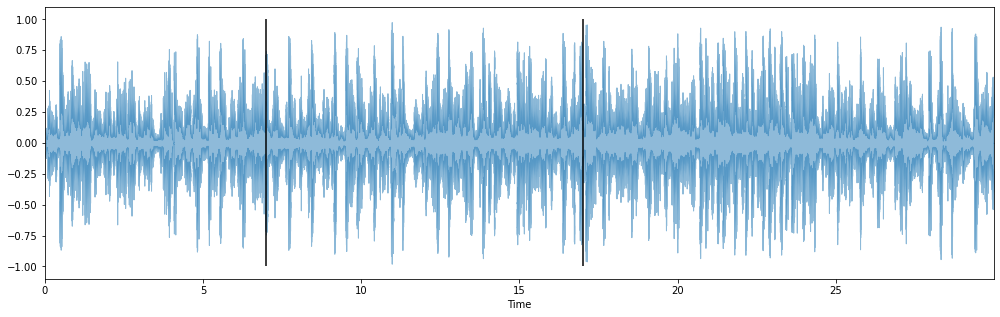

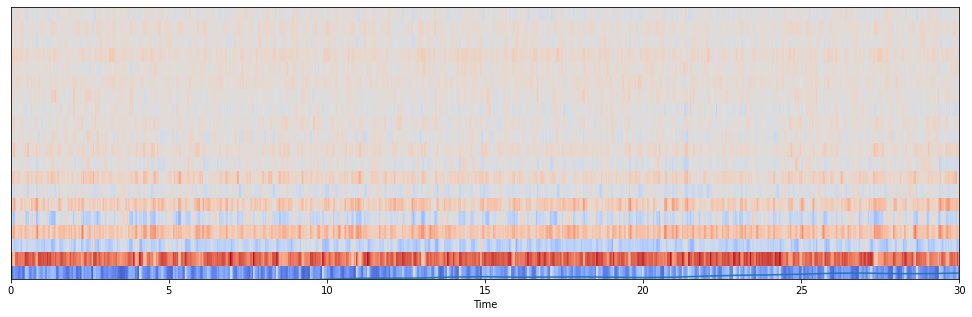

In [10]:
AUDIO_DIR = os.environ.get('AUDIO_DIR')

filename = utils.get_audio_path(AUDIO_DIR, 2)
print('File: {}'.format(filename))

x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 7, 17
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

librosa.display.waveplot(x, sr, alpha=0.5);
plt.vlines([start, end], -1, 1)

start = len(x) // 2
plt.figure()
plt.plot(x[start:start+2000])
plt.ylim((-1, 1));

stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
# log_mel = librosa.logamplitude(mel)

# librosa.display.specshow(log_mel, sr=sr, hop_length=512, x_axis='time', y_axis='mel');

mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = skl.preprocessing.StandardScaler().fit_transform(mfcc)
librosa.display.specshow(mfcc, sr=sr, x_axis='time');

In [11]:
import pandas as pd

In [105]:
# cleaning metadata csvs 

tracks = pd.read_csv("data/fma_metadata/tracks.csv", dtype = object)
# tracks.iloc[1][0] = "track_id"
# header_metadata = {"data_source": tracks.loc[0], "columns": tracks.loc[1]} 
# tracks.columns = header_metadata["columns"]
# tracks = tracks.drop([0, 1, 2], axis = 0).reset_index().drop("index", axis = 1)

genres = pd.read_csv("data/fma_metadata/genres.csv")

features = pd.read_csv('data/fma_metadata/features.csv', dtype = object)

echonest = pd.read_csv('data/fma_metadata/echonest.csv', dtype = object, header = None)
# echonest.iloc[2, 0] = "track_id"
# header_metadata["echonest_type"] = echonest.iloc[1]
# header_metadata["echonest_cols"] = echonest.iloc[2]
# echonest.columns = header_metadata["echonest_cols"]
# echonest = echonest.drop([0, 1, 2, 3], axis = 0).reset_index().drop("index", axis = 1)

In [106]:
np.testing.assert_array_equal(features.index, tracks.index)

assert echonest.index.isin(tracks.index).all()

AssertionError: 
Arrays are not equal

(shapes (106577,), (106576,) mismatch)
 x: array([     0,      1,      2, ..., 106574, 106575, 106576])
 y: array([     0,      1,      2, ..., 106573, 106574, 106575])

In [107]:
tracks.shape, genres.shape, features.shape, echonest.shape

((106576, 53), (163, 5), (106577, 519), (13133, 250))

In [108]:
ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())
ipd.display(tracks['set'].head())

0    bit_rate
1         NaN
2      256000
3      256000
4      256000
Name: track, dtype: object

0    comments
1         NaN
2           0
3           0
4           0
Name: album, dtype: object

0      active_year_begin
1                    NaN
2    2006-01-01 00:00:00
3    2006-01-01 00:00:00
4    2006-01-01 00:00:00
Name: artist, dtype: object

0       split
1         NaN
2    training
3    training
4    training
Name: set, dtype: object